Logistic Regression

회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델

시그모이드 함수를 적용

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-whitegrid'])

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [12]:
samples = 1000
X,y = make_classification(n_samples=samples,n_features=2,
                          n_informative=2,n_redundant=0,
                          n_clusters_per_class=1)

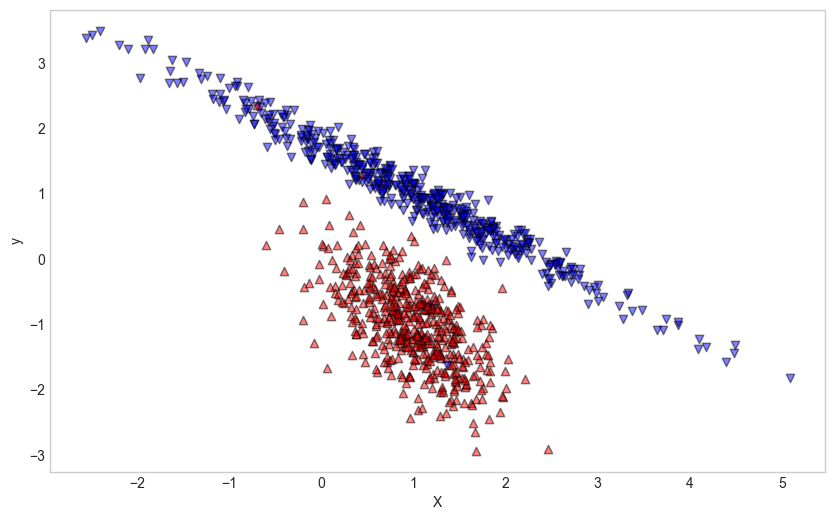

In [14]:
fig,ax= plt.subplots(1,1,figsize=(10,6))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples) :
    if y[i] == 0 :
        ax.scatter(X[i,0],X[i,1],edgecolor='k',alpha=0.5,marker='^',color='r')
    else :
        ax.scatter(X[i,0],X[i,1],edgecolor='k',alpha=0.5,marker='v',color='b')


In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.98875
0.985


In [18]:
scores = cross_val_score(model,X,y,scoring='accuracy',cv=10)
print('CV 평균 점수',scores.mean())

CV 평균 점수 0.9890000000000001


In [19]:
model.intercept_,model.coef_

(array([-4.1589426]), array([[3.34765545, 4.66742692]]))

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

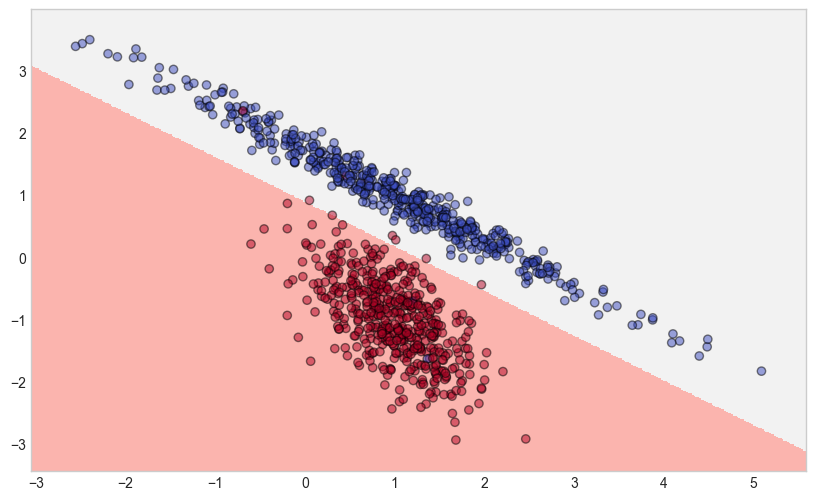

In [27]:
x_min,x_max = X[:,0].min() -0.5,X[:,0].max()+0.5
y_min,y_max = X[:,1].min() -0.5,X[:,1].max()+0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure(1,figsize=(10,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1)

plt.scatter(X[:,0],X[:,1],c=np.abs(y-1),edgecolors='k',alpha=0.5,cmap=plt.cm.coolwarm)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks()
plt.yticks()

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

In [33]:
import pandas as pd
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
species = pd.Series(iris.target,dtype='category')
species = species.cat.rename_categories(iris.target_names)

In [34]:
iris_df['species'] = species

In [35]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


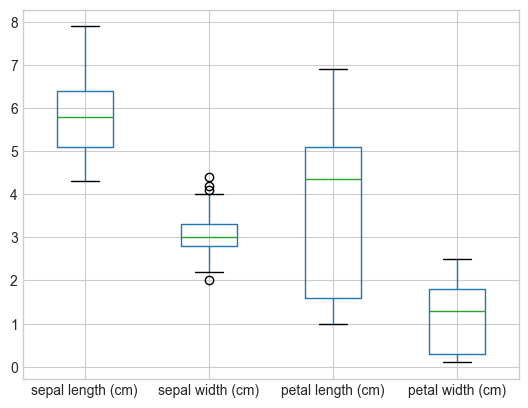

In [39]:
iris_df.boxplot();

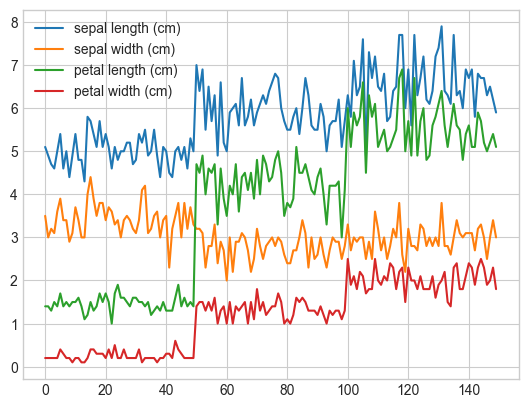

In [40]:
iris_df.plot();

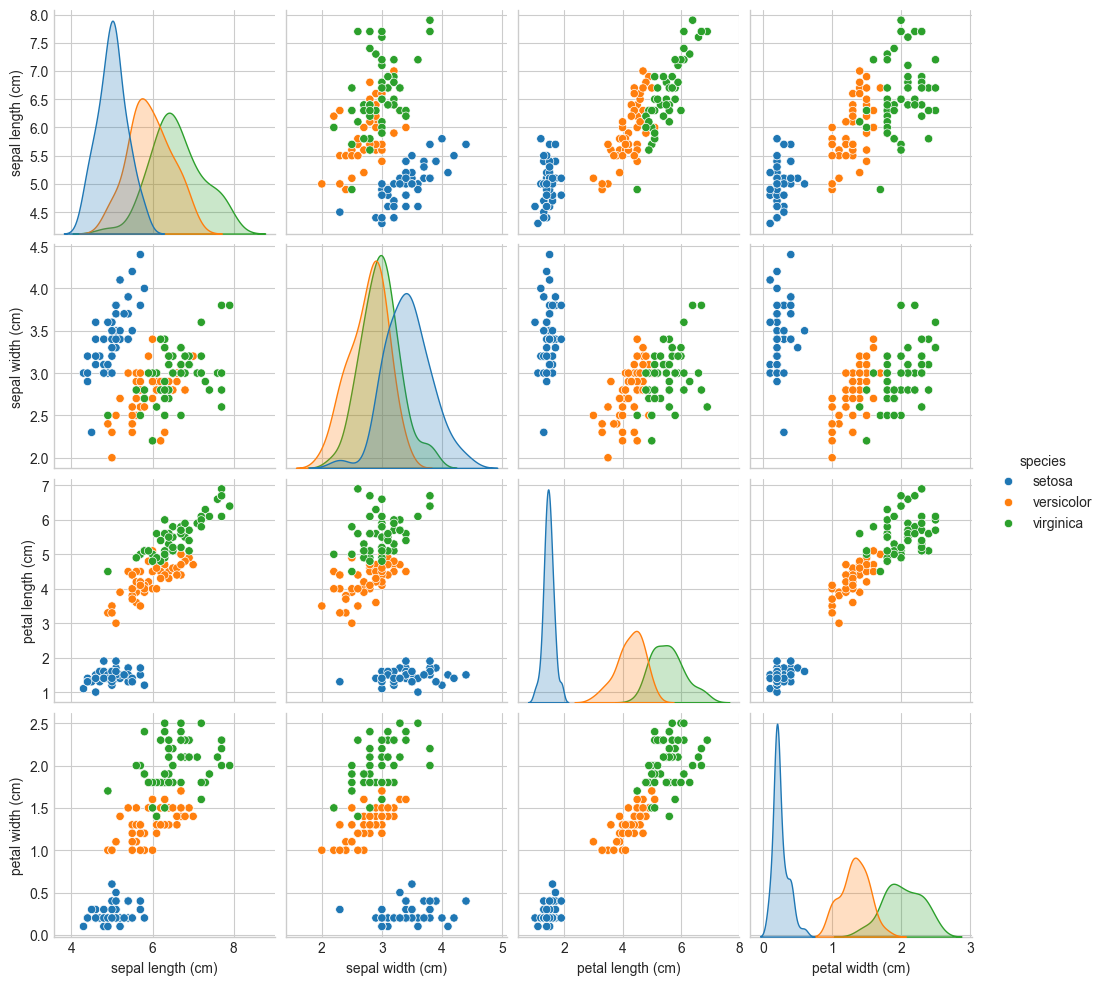

In [41]:
import seaborn as sns
sns.pairplot(iris_df,hue='species')

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(iris.data[:,[2,3]],iris.target,
                                               test_size=0.2,random_state=1,stratify=iris.target)


In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs",multi_class='auto',C=100.0,random_state=1)
model.fit(X_train,y_train)

LogisticRegression(C=100.0, random_state=1)

In [46]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9666666666666667
0.9666666666666667


In [51]:
import numpy as np
X = np.vstack((X_train,X_test))
y = np.hstack((y_train,y_test))


In [ ]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
x2_min , x2_max = X[:,1].min()-1,X[:,1].max()+1

xx1,xx2 = np.meshgrid(np.arange(x_min,x_max,0.02))